In [30]:
import pandas as pd
import ast
import nltk
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
!pip3 install nltk
import nltk
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt

You should consider upgrading via the '/home/sundesh/Documents/git/ITU-Challenge/torch_rl/bin/python -m pip install --upgrade pip' command.


In [2]:
df = pd.read_csv('./bronze_dataset.csv')

/home/sundesh/Documents/git/ITU-Challenge/torch_rl/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,2,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'time',
       'timezone', 'user_id', 'username', 'name', 'place', 'tweet', 'language',
       'mentions', 'urls', 'photos', 'replies_count', 'retweets_count',
       'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url',
       'video', 'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [20]:
df = df[df['hashtags'].notna()]

In [21]:
hashtags = []
for l in df['hashtags'].to_list():
    if type(l) is "nan": 
        continue
    
    l = ast.literal_eval(l)
    hashtags.extend(l)

In [22]:
fdist = nltk.FreqDist(hashtags)

In [23]:
for key in fdist:
    print ("'%s' occurred %s times" % (key, fdist[key]))

'vaccine' occurred 48747 times
'covid19' occurred 16692 times
'covid' occurred 3629 times
'coronavirus' occurred 2902 times
'vaccineswork' occurred 1338 times
'vaccination' occurred 1313 times
'covidvaccine' occurred 1227 times
'pfizer' occurred 1154 times
'covid_19' occurred 1002 times
'vaccinated' occurred 887 times
'astrazeneca' occurred 812 times
'pandemic' occurred 727 times
'vaccines' occurred 725 times
'china' occurred 589 times
'moderna' occurred 575 times
'india' occurred 562 times
'nhs' occurred 515 times
'getvaccinated' occurred 495 times
'sarscov2' occurred 475 times
'science' occurred 430 times
'vaccinessavelives' occurred 419 times
'covid19vaccine' occurred 414 times
'measles' occurred 407 times
'lockdown' occurred 346 times
'covidー19' occurred 344 times
'flu' occurred 342 times
'covaxin' occurred 313 times
'health' occurred 305 times
'auspol' occurred 299 times
'hpv' occurred 268 times
'sinopharm' occurred 262 times
'publichealth' occurred 255 times
'covishield' occurred

'scottythecoward' occurred 3 times
'covidfree' occurred 3 times
'ramadankareem' occurred 3 times
'haiku' occurred 3 times
'vaccinateeducatorsnow' occurred 3 times
'math' occurred 3 times
'aspen' occurred 3 times
'standup' occurred 3 times
'fingerscrossed' occurred 3 times
'antiscience' occurred 3 times
'mn' occurred 3 times
'southafricanvariant' occurred 3 times
'calderdale' occurred 3 times
'pandemia' occurred 3 times
'clotmorrison' occurred 3 times
'needle' occurred 3 times
'tika_vaccination_utsav' occurred 3 times
'trauma' occurred 3 times
'compassion' occurred 3 times
'frenchbulldog' occurred 3 times
'shigella' occurred 3 times
'moh' occurred 3 times
'dexamethasone' occurred 3 times
'princephilip' occurred 3 times
'pub' occurred 3 times
'scottythequeuejumper' occurred 3 times
'teambradford' occurred 3 times
'pharmacy24' occurred 3 times
'americanrescueplan' occurred 3 times
'bjpfailsindia' occurred 3 times
'shops' occurred 3 times
'punk' occurred 3 times
'sketch' occurred 3 times
'

'gamedefi' occurred 1 times
'altcoins' occurred 1 times
'doge' occurred 1 times
'safemoon' occurred 1 times
'shib' occurred 1 times
'feg' occurred 1 times
'link' occurred 1 times
'ada' occurred 1 times
'itsnotavaccine' occurred 1 times
'voteliberal' occurred 1 times
'each1get1' occurred 1 times
'hul' occurred 1 times
'hindustanunilever' occurred 1 times
'smarthealthcards' occurred 1 times
'vci' occurred 1 times
'wakeupnewyork' occurred 1 times
'mu' occurred 1 times
'labordayweekend' occurred 1 times
'heroin' occurred 1 times
'wearingiscaring' occurred 1 times
'maskssavelives' occurred 1 times
'pandemiceffect' occurred 1 times
'bookblogs' occurred 1 times
'booktwt' occurred 1 times
'bookbloggers' occurred 1 times
'washingtonpost' occurred 1 times
'laborday2021' occurred 1 times
'1crore' occurred 1 times
'demcastga' occurred 1 times
'marcbernier' occurred 1 times
'4thantivaxhost' occurred 1 times
'batoche' occurred 1 times
'medicalaparthide' occurred 1 times
'telstra' occurred 1 times
'a

'miota' occurred 1 times
'zebra' occurred 1 times
'covieshield' occurred 1 times
'icubeds' occurred 1 times
'ayush64' occurred 1 times
'goodhealth' occurred 1 times
'asu' occurred 1 times
'albertateachers' occurred 1 times
'redforedab' occurred 1 times
'stickit' occurred 1 times
'redfored' occurred 1 times
'covidheroes' occurred 1 times
'draftday' occurred 1 times
'wewillbeatu' occurred 1 times
'maythe4thbewithyou' occurred 1 times
'maythefourth' occurred 1 times
'senior' occurred 1 times
'reporters' occurred 1 times
'skeptical' occurred 1 times
'recommendation' occurred 1 times
'nic' occurred 1 times
'procedure' occurred 1 times
'keepinmind' occurred 1 times
'uniform' occurred 1 times
'liquidform' occurred 1 times
'dm' occurred 1 times
'complementbiology' occurred 1 times
'maritimeconnection' occurred 1 times
'tagalog' occurred 1 times
'derbyshire' occurred 1 times
'covdi19' occurred 1 times
'roadmapforhealth' occurred 1 times
'ghypressclub' occurred 1 times
'jumanji' occurred 1 times

'bcgov' occurred 1 times
'modivaccinated' occurred 1 times
'modisilencesvaccinedoubters' occurred 1 times
'germans' occurred 1 times
'emergencyfood' occurred 1 times
'stabby' occurred 1 times
'jabby' occurred 1 times
'stabstab' occurred 1 times
'keepkingstonsafe' occurred 1 times
'jaishankar' occurred 1 times
'terminalillness' occurred 1 times
'vaccinationcentre' occurred 1 times
'herooftheday' occurred 1 times
'retiredhero' occurred 1 times
'chinacovid19tracker' occurred 1 times
'rsgc' occurred 1 times
'jan6insurrection' occurred 1 times
'anxietyattacks' occurred 1 times
'startupcentral' occurred 1 times
'mohnarahenpita' occurred 1 times
'lk' occurred 1 times
'repealfarmlaws' occurred 1 times
'petrol' occurred 1 times
'lpg' occurred 1 times
'haz' occurred 1 times
'nextepisode' occurred 1 times
'gulf' occurred 1 times
'romemedthisweek' occurred 1 times
'urbannaxals' occurred 1 times
'naveenpatnaik' occurred 1 times
'covidfreeodisha' occurred 1 times
'indianvaccine' occurred 1 times
'aa

'2021bounceback' occurred 1 times
'chinesereckoning' occurred 1 times
'hamburg' occurred 1 times
'doctorsarehumanstoo' occurred 1 times
'2020year' occurred 1 times
'nyel2021' occurred 1 times
'protectusall' occurred 1 times
'prosperous' occurred 1 times
'cumberlege' occurred 1 times
'psychtwitter' occurred 1 times
'joyvaxscrolling' occurred 1 times
'sharpeway' occurred 1 times
'newyearresolution' occurred 1 times
'covid19sucks' occurred 1 times
'mywifeisanurse' occurred 1 times
'midsussexpolice' occurred 1 times
'keephaywardsheathsafe' occurred 1 times
'pcso38643' occurred 1 times
'variantcovid' occurred 1 times
'tenncare' occurred 1 times
'gpisopen' occurred 1 times
'blackinpublichealth' occurred 1 times
'notgivingupourshot' occurred 1 times
'administrativestaff' occurred 1 times
'kaust' occurred 1 times
'kaustcommunity' occurred 1 times
'protecttheherd' occurred 1 times
'wtaf' occurred 1 times
'clinicalevidence' occurred 1 times
'nye2021' occurred 1 times
'hope2021' occurred 1 times


'coronvirusuk' occurred 1 times
'sciencesheroes' occurred 1 times
'pesticides' occurred 1 times
'edc' occurred 1 times
'chemicals' occurred 1 times
'humansofgenecology' occurred 1 times
'koalaretrovirus' occurred 1 times
'vaccinecourt' occurred 1 times
'btb' occurred 1 times
'healthcarespeaksup' occurred 1 times
'infantmortalityrate' occurred 1 times
'protectkids' occurred 1 times
'passs7573' occurred 1 times
'accesstocare' occurred 1 times
'ab1965' occurred 1 times
'yesonab1965' occurred 1 times
'takeaction' occurred 1 times
'csiro' occurred 1 times
'cuts' occurred 1 times
'iwd' occurred 1 times
'womenforresearch' occurred 1 times
'endchildpoverty' occurred 1 times
'ilc' occurred 1 times
'oer' occurred 1 times
'healthinsurance' occurred 1 times
'schumer' occurred 1 times
'covid19us' occurred 1 times
'dukenusresearch' occurred 1 times
'capsules' occurred 1 times
'informedconscent' occurred 1 times
'corvid19' occurred 1 times
'antivaxxerlogic' occurred 1 times
'shitantivaxxerssay' occur

In [119]:
keywords = fdist.most_common(30)
keywords = pd.DataFrame(keywords, columns = ['word', 'freq'])
keywords["radius"] =round((np.sqrt(keywords.freq) * 10)/2)


In [120]:
import circlify

# compute circle positions:
circles = circlify.circlify(
    keywords['freq'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

In [121]:
circles

[Circle(x=-0.43893421500537005, y=-0.846750455108111, r=0.04624448713091409, level=1, ex={'datum': 268}),
 Circle(x=-0.7323881057271642, y=-0.5577513019510044, r=0.0488459054491082, level=1, ex={'datum': 299}),
 Circle(x=-0.5881727273071969, y=-0.7439029278370468, r=0.04933356385061744, level=1, ex={'datum': 305}),
 Circle(x=0.0806308111830072, y=-0.7768366330311613, r=0.04997637354739992, level=1, ex={'datum': 313}),
 Circle(x=-0.6548436087627002, y=-0.6371657156307621, r=0.05224029531314517, level=1, ex={'datum': 342}),
 Circle(x=-0.7292182540786448, y=-0.45656221170091893, r=0.052392822047406404, level=1, ex={'datum': 344}),
 Circle(x=-0.24967488479805133, y=-0.8287103449830004, r=0.05254490603072548, level=1, ex={'datum': 346}),
 Circle(x=-0.03156639876594004, y=-0.8026510904213935, r=0.05698883446973065, level=1, ex={'datum': 407}),
 Circle(x=-0.48168908239920144, y=-0.7522510841654966, r=0.057476821164025575, level=1, ex={'datum': 414}),
 Circle(x=-0.3627416996298115, y=-0.775865

In [122]:
# list of labels
labels = keywords['word'][::-1]
f = keywords['freq'].to_list()
for i in range(len(labels)):
    labels[i] = "#" + labels[i]+"\n"+str(f[i])

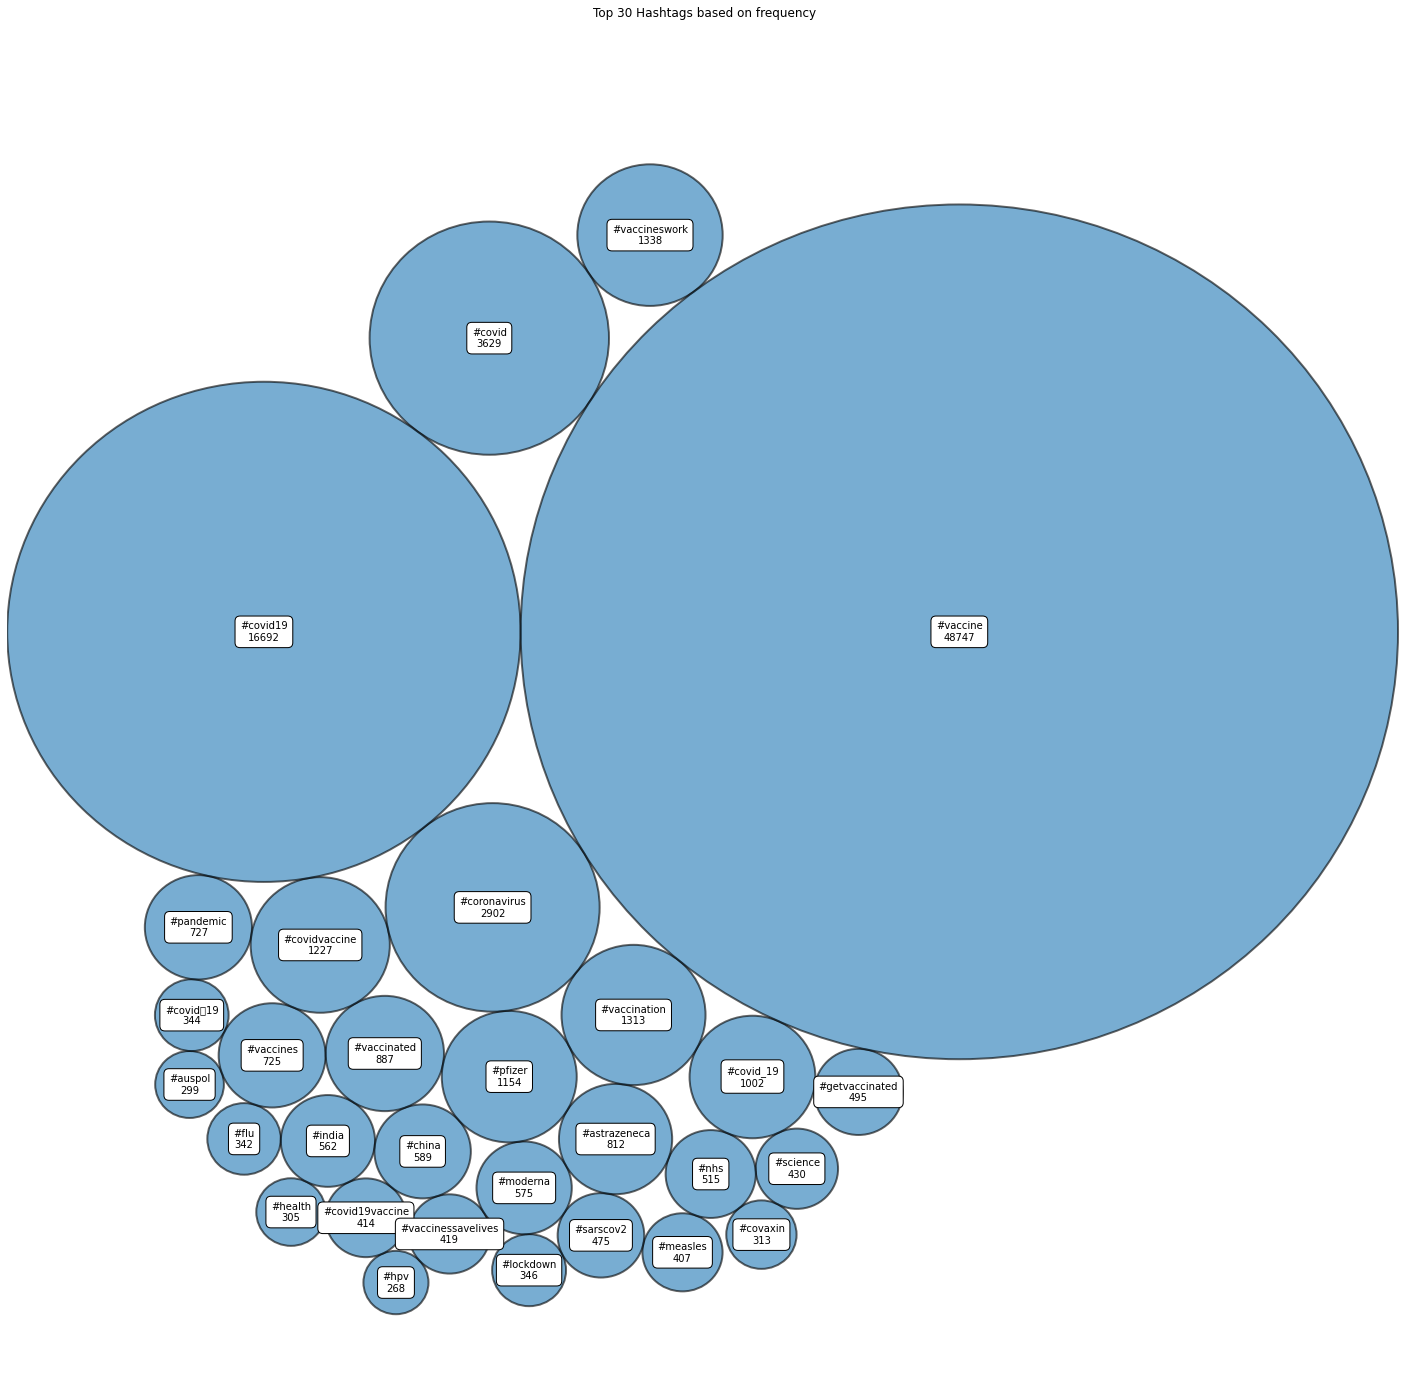

In [126]:
ig, ax = plt.subplots(figsize=(25,25))

# Title
ax.set_title('Top 30 Hashtags based on frequency')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.6, linewidth=2, edgecolor="black"))
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))
